In [37]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from tvDatafeed import TvDatafeed, Interval
import statistics
import matplotlib.pyplot as plt

In [38]:
tv=TvDatafeed()

In [39]:
df=tv.get_hist(symbol='AAPL',exchange='NASDAQ',interval=Interval.in_daily, n_bars=200)

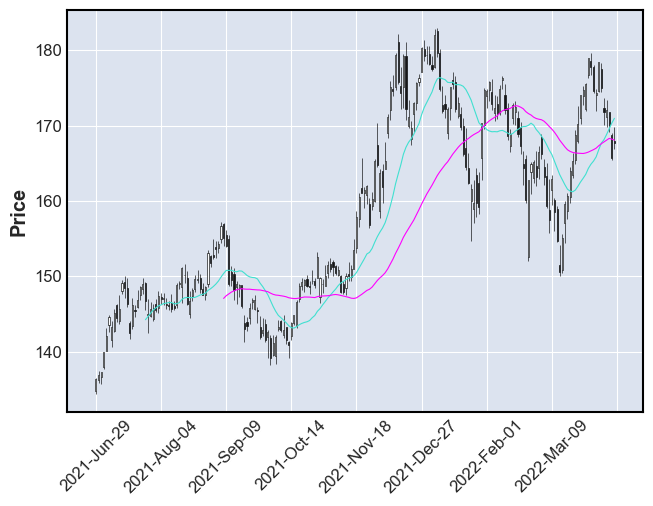

In [40]:
x=mpf.plot(df, type='candle', mav=(20,50))

In [41]:
df['SMA20']=df['close'].rolling(window=20).mean()
df['SMA50']=df['close'].rolling(window=50).mean()

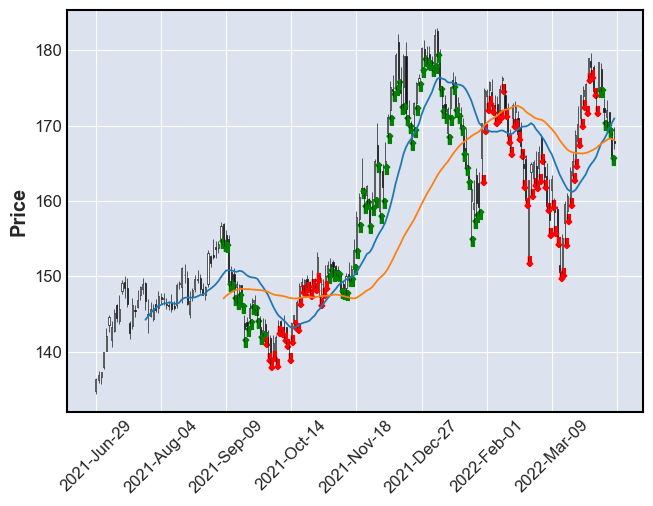

In [43]:
buy=np.where((df['SMA20'].shift(-1)>df['SMA50'].shift(-1)),1,np.nan)*df['low']
sell=np.where((df['SMA20'].shift(-1)<df['SMA50'].shift(-1)),1,np.nan)*df['low']
apd = [mpf.make_addplot(buy, scatter=True, markersize=50, marker=r'$\Uparrow$', color='green'),mpf.make_addplot(sell, scatter=True, markersize=50, marker=r'$\Downarrow$', color='red'),mpf.make_addplot(df['SMA20']), mpf.make_addplot(df['SMA50'])]
mpf.plot(df, type='candle', addplot=apd)

In [ ]:
df.to_csv('nifty50.csv')

In [ ]:
close_list = df['close'].values
close_list

array([136.33, 136.96, 137.27, 139.96, 142.02, 144.57, 143.24, 145.11,
       144.5 , 145.64, 149.15, 148.48, 146.39, 142.45, 146.15, 145.4 ,
       146.8 , 148.56, 148.99, 146.77, 144.98, 145.64, 145.86, 145.52,
       147.36, 146.95, 147.06, 146.14, 146.09, 145.6 , 145.86, 148.89,
       149.1 , 151.12, 150.19, 146.36, 146.7 , 148.19, 149.71, 149.62,
       148.36, 147.54, 148.6 , 153.12, 151.83, 152.51, 153.65, 154.3 ,
       156.69, 155.11, 154.07, 148.97, 149.55, 148.12, 149.03, 148.79,
       146.06, 142.94, 143.43, 145.85, 146.83, 146.92, 145.37, 141.91,
       142.83, 141.5 , 142.65, 139.14, 141.11, 142.  , 143.29, 142.9 ,
       142.81, 141.51, 140.91, 143.76, 144.84, 146.55, 148.76, 149.26,
       149.48, 148.69, 148.64, 149.32, 148.85, 152.57, 149.8 , 148.96,
       150.02, 151.49, 150.96, 151.28, 150.44, 150.81, 147.92, 147.87,
       149.99, 150.  , 151.  , 153.49, 157.87, 160.55, 161.02, 161.41,
       161.94, 156.81, 160.24, 165.3 , 164.77, 163.76, 161.84, 165.32,
      

In [ ]:
sma20_list = df['SMA20'].values
sma50_list = df['SMA50'].values

In [ ]:
buy = 0
sell = 0
pos_held = 0
startBal = 1500
balance = startBal

In [ ]:
sell_arr = []
buy_arr = []
max_sell_arr = []
min_buy_arr = []


for i in range(50, len(close_list)):
    ma20 = sma20_list[i]
    ma50 = sma50_list[i]
    if ma50 > ma20:
        sell_arr.append(close_list[i])
    else:
        if len(sell_arr) > 0:
            max_sell_arr.append(max(sell_arr))
        sell_arr.clear()
if len(sell_arr) > 0:
    max_sell_arr.append(max(sell_arr))
print("SELL " + str(max_sell_arr))
for i in range(50, len(close_list)):
    ma20 = sma20_list[i]
    ma50 = sma50_list[i]
    if ma50 < ma20:
        buy_arr.append(close_list[i])
    else:
        if len(buy_arr) > 0:
            min_buy_arr.append(min(buy_arr))
        buy_arr.clear()
if len(buy_arr) > 0:
    min_buy_arr.append(min(buy_arr))
print("BUY " + str(min_buy_arr))

SELL [152.57, 178.96]
BUY [141.5, 147.87, 165.75]


In [ ]:
for i in range(50, len(close_list)):
    # ma20 = sma20_list[i]
    # ma50 = sma50_list[i]
    last_price = close_list[i]
    if last_price in min_buy_arr and not pos_held:
        balance -= last_price
        pos_held = True
        buy += 1
    elif last_price in max_sell_arr and pos_held:
        balance += last_price
        pos_held = False
        sell += 1


In [ ]:
print("Buys: " + str(buy))
print("Sells: " + str(sell))

if buy > sell:
    balance += close_list[-1]


print("Final Balance: " + str(balance))

print("Profit if held: " + str(close_list[-1] - close_list[50]))
print("Profit from algorithm: " + str(balance - startBal))

Buys: 3
Sells: 2
Final Balance: 1544.36
Profit if held: 13.879999999999995
Profit from algorithm: 44.3599999999999
